### 2109106107
### Grace Ligit Nuh
### POSTTEST 5

#### Import Library

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

#### Link Dataset
https://drive.google.com/file/d/1D5L3P2ASGCJA_vq-n9WJ_ygbesnxRHYC/view?usp=sharing

#### Membaca Dataset

In [114]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### A. Supervised Learning

##### Support Vector Classifier (dari SVM)

Pisahkan fitur (X) dan label (y)

In [115]:
X = df[['age', 'hours-per-week']] 
y = df['income'] 

Bagi dataset menjadi data pelatihan dan data pengujian

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Inisialisasi model SVC

In [117]:
svc = SVC()

Latih model SVC pada data pelatihan

In [118]:
svc.fit(X_train, y_train)

SVC()

Lakukan prediksi dengan SVC pada data pengujian

In [119]:
y_pred_svc = svc.predict(X_test)

Hitung confusion matrix dengan SVC

In [120]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Hitung classification report dengan SVC

In [121]:
class_report_svc = classification_report(y_test, y_pred_svc)

Tampilkan hasil evaluasi dengan SVC

Confusion Matrix

In [122]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Visualisasi Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

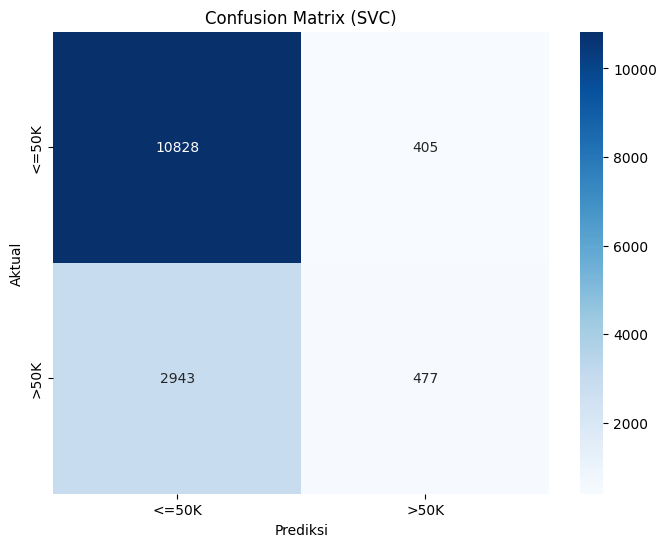

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

Classification Report

In [124]:
class_report_svc = classification_report(y_test, y_pred_svc)

Visualisasi Classification Report

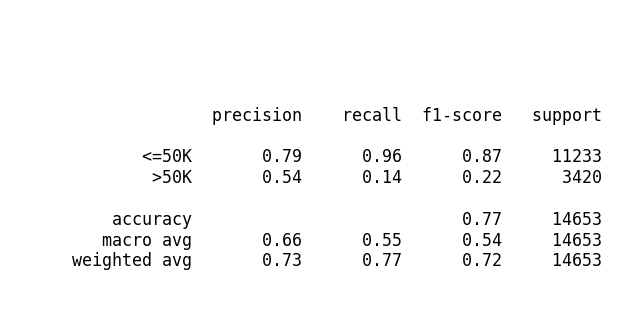

In [125]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

Plot Hasil Prediksi dan Target Asli dengan SVC

Konversi label kelas ke kode warna numerik

In [126]:
color_map = {'<=50K': 'r', '>50K': 'g'}
y_pred_colors = [color_map[label] for label in y_pred_svc]
y_test_colors = [color_map[label] for label in y_test]

Visualisasi Data

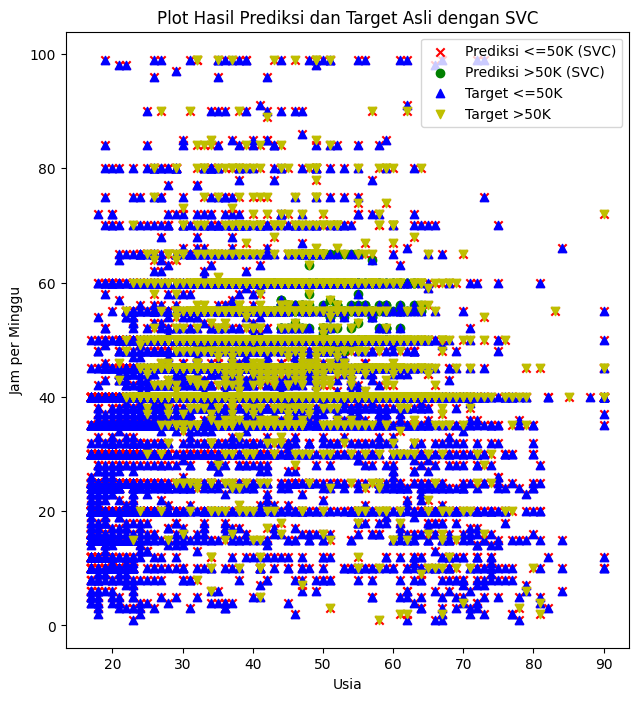

In [127]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Titik-titik hasil prediksi SVC dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi <=50K (SVC)
plt.scatter(X_test[y_pred_svc == '<=50K']['age'], X_test[y_pred_svc == '<=50K']['hours-per-week'], c='r', marker='x', label='Prediksi <=50K (SVC)')

# Prediksi >50K (SVC)
plt.scatter(X_test[y_pred_svc == '>50K']['age'], X_test[y_pred_svc == '>50K']['hours-per-week'], c='g', marker='o', label='Prediksi >50K (SVC)')

# Titik-titik target asli dengan warna berbeda (biru untuk <=50K, kuning untuk >50K)
# Target <=50K
plt.scatter(X_test[y_test == '<=50K']['age'], X_test[y_test == '<=50K']['hours-per-week'], c='b', marker='^', label='Target <=50K')

# Target >50K
plt.scatter(X_test[y_test == '>50K']['age'], X_test[y_test == '>50K']['hours-per-week'], c='y', marker='v', label='Target >50K')

plt.xlabel('Usia')
plt.ylabel('Jam per Minggu')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()

##### Implementasi Metode K-Nearest Neighbors (KNN)

Inisialisasi model KNN

In [128]:
knn = KNeighborsClassifier(n_neighbors=3)

Latih model KNN pada data pelatihan

In [129]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Lakukan prediksi dengan KNN pada data pengujian

In [130]:
y_pred_knn = knn.predict(X_test)

Hitung confusion matrix dengan KNN

In [131]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Hitung classification report dengan KNN

In [132]:
class_report_knn = classification_report(y_test, y_pred_knn)

Tampilkan hasil evaluasi dengan KNN

Confusion Matrix

In [133]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Visualisasi Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (KNN)')

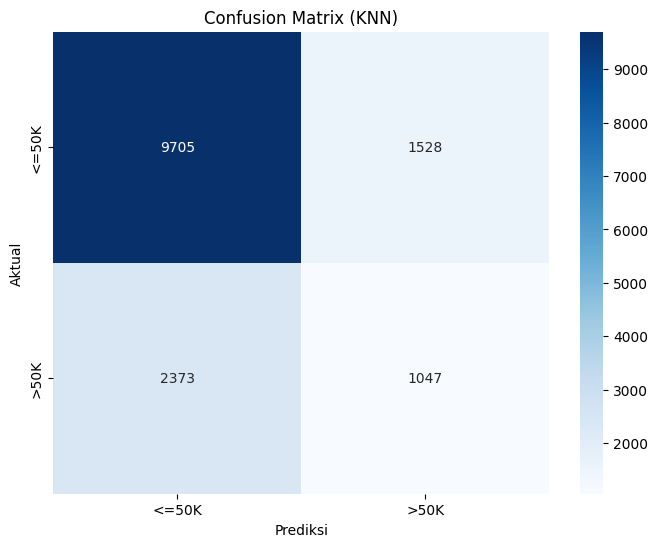

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (KNN)')

Classification Report

In [135]:
class_report_knn = classification_report(y_test, y_pred_knn)

Visualisasi Classification Report

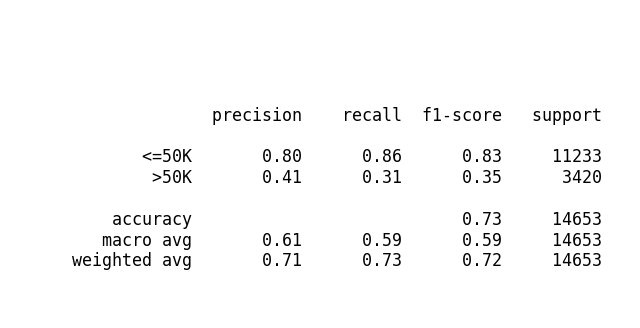

In [136]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_knn, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

Plot Hasil Prediksi dan Target Asli dengan KNN

Visualisasi Data untuk model KNN

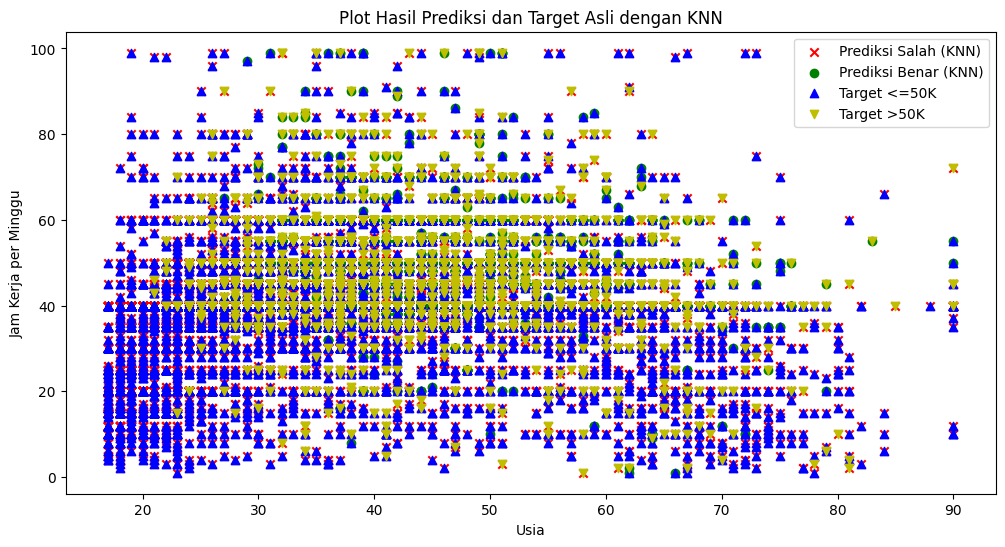

In [137]:
plt.figure(figsize=(12, 6))

# Titik-titik hasil prediksi KNN dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi <=50K (KNN)
plt.scatter(X_test[y_pred_knn == '<=50K']['age'], X_test[y_pred_knn == '<=50K']['hours-per-week'], c='r', marker='x', label='Prediksi Salah (KNN)')

# Prediksi >50K (KNN)
plt.scatter(X_test[y_pred_knn == '>50K']['age'], X_test[y_pred_knn == '>50K']['hours-per-week'], c='g', marker='o', label='Prediksi Benar (KNN)')

# Titik-titik target asli dengan warna berbeda (biru untuk <=50K, kuning untuk >50K)
# Target <=50K
plt.scatter(X_test[y_test == '<=50K']['age'], X_test[y_test == '<=50K']['hours-per-week'], c='b', marker='^', label='Target <=50K')

# Target >=50K
plt.scatter(X_test[y_test == '>50K']['age'], X_test[y_test == '>50K']['hours-per-week'], c='y', marker='v', label='Target >50K')

plt.xlabel('Usia')
plt.ylabel('Jam Kerja per Minggu')
plt.title('Plot Hasil Prediksi dan Target Asli dengan KNN')
plt.legend(loc='best')
plt.show()

##### Linear Regression

Pilih fitur dan label

In [138]:
X = df[['educational-num','hours-per-week']]

Gunakan 'age' sebagai label

In [139]:
y = df['age'] 

Bagi dataset menjadi data latih dan data uji

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membangun model Linear Regression

In [141]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Melakukan prediksi

In [142]:
y_pred = model.predict(X_test)

Menghitung MAE, MSE, RMSE, dan R2-Score

In [143]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)

Tampilkan hasil

In [144]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 11.129304585613921
MSE: 185.30729670520662
RMSE: 13.61276227314672
R2-Score: 0.0064577106949161855


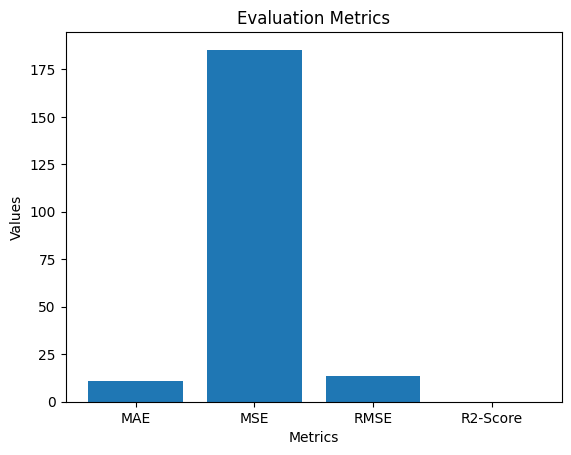

In [145]:
# Data metrik
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]

# Plot bar untuk menampilkan metrik
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

Plot Hasil Prediksi dan Target Asli

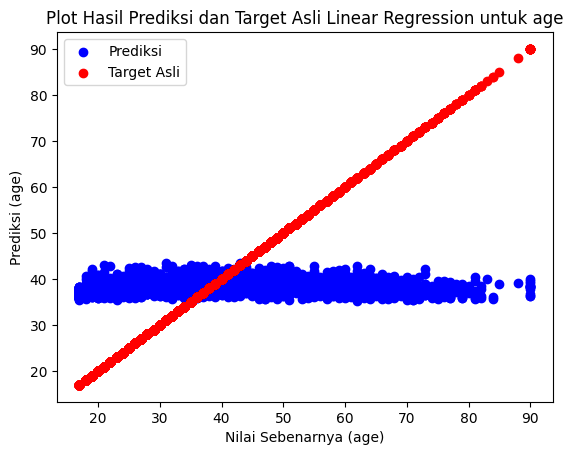

In [146]:
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (age)")
plt.ylabel("Prediksi (age)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk age")
plt.legend()
plt.show()

#### B. Unsupervised Learning

##### B1. Implementasi Metode K-Means:

Menggunakan kolom age (kolom ke-0) dan educational-num (kolom ke-4)

In [147]:
X = df.iloc[:, [0, 4]].values 

Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

In [148]:
wcss = []  

Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)

In [149]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

Buat grafik Elbow Method

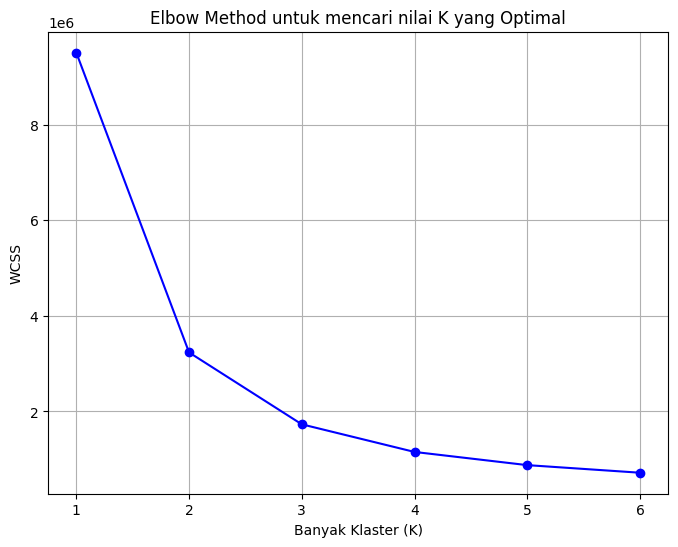

In [150]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Inisialisasi model K-Means dengan nilai K yang sesuai

In [151]:
k = 3 
kmeans = KMeans(k, n_init=10)

Pilih hanya kolom "age" dan "educational-num" sebagai fitur X.

In [152]:
X = df[["age", "educational-num"]]

Fit model K-Means pada dataset

In [153]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Prediksi cluster untuk setiap data point dalam dataset

In [154]:
predicted_clusters = kmeans.predict(X)

Tambahkan kolom "cluster" ke dataset


In [155]:
df["cluster"] = predicted_clusters

##### B2. Evaluasi Cluster yang telah diprediksi

a. Unlabeled Dataset (Dataset Tanpa Label)

X adalah dataset yang telah di-cluster dengan K-Means

predicted_clusters adalah hasil clustering yang telah diprediksi

In [156]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.51
Davies-Bouldin Index: 0.63
Calinski-Harabasz Index: 109701.82


b. Labeled Dataset (Dataset Dengan Label)

true_labels adalah kolom yang berisi label asli dataset

In [157]:
true_labels = df['income']

Menggantilah dengan nama dataset yang sesuai dan predicted_clusters yang sesuai

In [158]:
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
income  <=50K  >50K
row_0              
0        6687  3121
1       17852  1854
2       12616  6712 



Adjusted Rand Index (ARI)

In [159]:
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.05


Normalized Mutual Information (NMI)

In [160]:
nmi_age = normalized_mutual_info_score(df['age'], predicted_clusters)
nmi_educational_num = normalized_mutual_info_score(df['educational-num'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) for Age: {nmi_age:.2f}")
print(f"Normalized Mutual Information (NMI) for Educational Num: {nmi_educational_num:.2f}")

Normalized Mutual Information (NMI) for Age: 0.42
Normalized Mutual Information (NMI) for Educational Num: 0.02


Fungsi HCV-M

In [161]:

homogeneity = homogeneity_score(true_labels, predicted_clusters)
completeness = completeness_score(true_labels, predicted_clusters)
v_measure = v_measure_score(true_labels, predicted_clusters)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")


Homogeneity Score: 0.08
Completeness Score: 0.04
V-Measure Score: 0.05


##### B2. Menampilkan hasil prediksi clustering dengan target asli

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4612\2127937231.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x="age", y="educational-num", palette=colors,


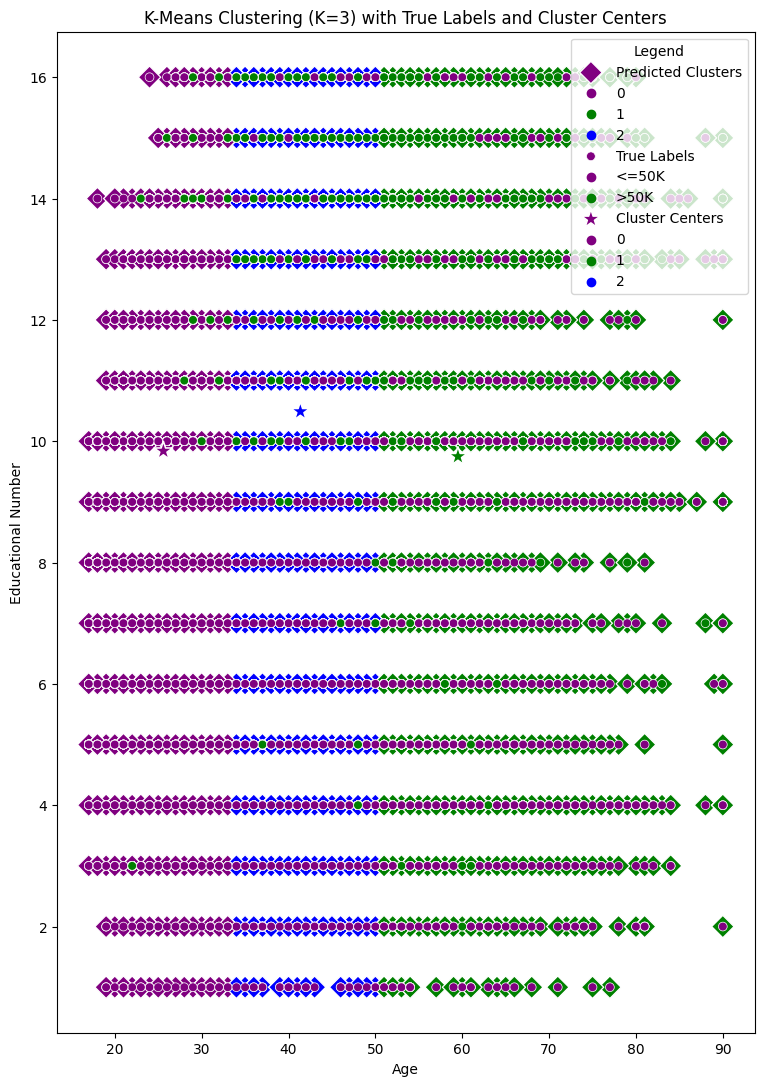

In [179]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=df, x="age", y="educational-num", palette=colors,
                hue="cluster_mapped", marker="D", s=130, label="Predicted Clusters")

# Scatter plot target asli
sns.scatterplot(data=df, x="age", y="educational-num", palette=colors,
                hue="income", marker="o", s=40, label="True Labels")

# Tambahkan titik pusat cluster
cluster_centers = df.groupby("cluster_mapped").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["age"], y=cluster_centers["educational-num"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="Cluster Centers")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("Age")
plt.ylabel("Educational Number")
plt.legend(title="Legend", loc="upper right")
plt.show()